In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import json

In [2]:
best_xgb = joblib.load('../models/xgboost_model.pkl')
# Load other models if needed
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')
# Handle y_test - check if it's a DataFrame and squeeze if needed
if isinstance(y_test, pd.DataFrame):
    if y_test.shape[1] == 1:
        y_test = y_test.squeeze()
    else:
        # If it has column name, extract the column
        y_test = y_test.iloc[:, 0]

print(f"Test data loaded - X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Model loaded: {type(best_xgb).__name__}")

Test data loaded - X_test shape: (4127, 25), y_test shape: (4127,)
Model loaded: XGBRegressor


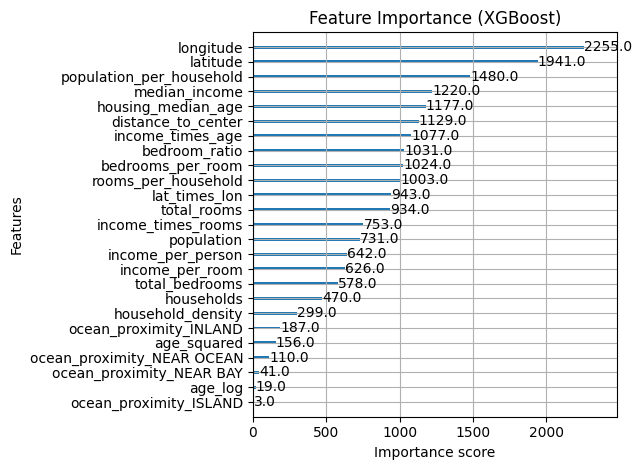

In [3]:
import xgboost as xgb
xgb.plot_importance(best_xgb, importance_type='weight')
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/feature_importance.png')
plt.show()

In [4]:
# ============================================
# BEST MODEL EVALUATION
# ============================================

# Make predictions with best model
y_pred = best_xgb.predict(X_test)

# Calculate metrics
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_best_xgb = r2_score(y_test, y_pred)

print("="*70)
print("BEST MODEL EVALUATION - XGBoost (Tuned)")
print("="*70)
print(f"{'Metric':<30} {'Value':<30}")
print("-"*70)
print(f"{'R² Score':<30} {r2_best_xgb:<30.6f}")
print(f"{'RMSE':<30} ${rmse_best_xgb:<29,.2f}")
print("="*70)
print(f"\n📊 Model Performance:")
print(f"   • R² Score: {r2_best_xgb:.6f} ({r2_best_xgb*100:.2f}%)")
print(f"   • RMSE: ${rmse_best_xgb:,.2f}")
print(f"\n✅ The model explains {r2_best_xgb*100:.2f}% of the variance in house prices.")
print(f"💰 Average prediction error: ${rmse_best_xgb:,.2f}")

BEST MODEL EVALUATION - XGBoost (Tuned)
Metric                         Value                         
----------------------------------------------------------------------
R² Score                       0.847391                      
RMSE                           $45,371.90                    

📊 Model Performance:
   • R² Score: 0.847391 (84.74%)
   • RMSE: $45,371.90

✅ The model explains 84.74% of the variance in house prices.
💰 Average prediction error: $45,371.90


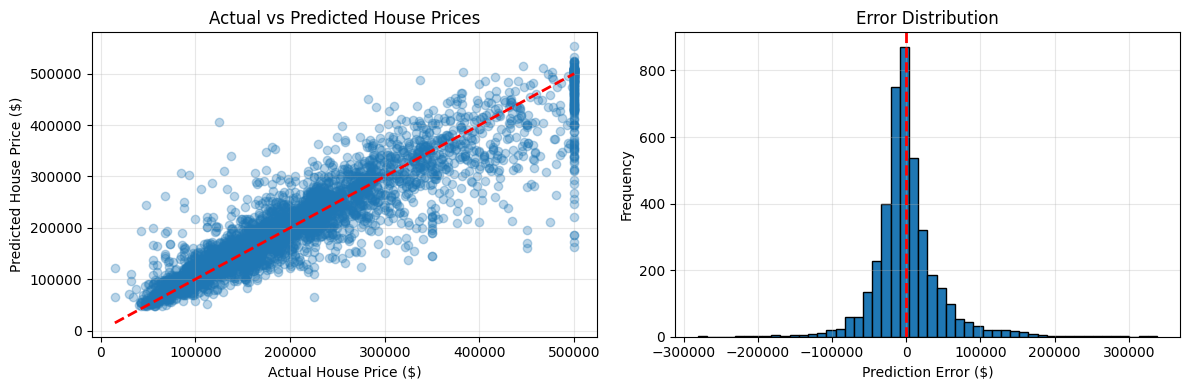


Error Statistics:
Mean Error: $843.27
Median Error: $-3,657.28
Std Error: $45,369.56


In [5]:
# Error Analysis
errors = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Price ($)')
plt.ylabel('Predicted House Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
os.makedirs('../reports/figures', exist_ok=True)
plt.savefig('../reports/figures/error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print error statistics
print("\nError Statistics:")
print(f"Mean Error: ${errors.mean():,.2f}")
print(f"Median Error: ${errors.median():,.2f}")
print(f"Std Error: ${errors.std():,.2f}")

In [6]:
# ============================================
# SAVE EVALUATION RESULTS
# ============================================

# Load model metadata if it exists to get hyperparameters
model_metadata_path = '../models/model_metadata.json'
hyperparameters = {}

if os.path.exists(model_metadata_path):
    with open(model_metadata_path, 'r') as f:
        metadata = json.load(f)
        hyperparameters = metadata.get('hyperparameters', {})
else:
    # Try to get best params if available (from GridSearchCV)
    if hasattr(best_xgb, 'get_params'):
        hyperparameters = best_xgb.get_params()

# Save evaluation results
results = {
    "best_model": "XGBoost Regressor (Tuned)",
    "r2_score": float(r2_best_xgb),
    "rmse": float(rmse_best_xgb),
    "hyperparameters": hyperparameters,
    "test_samples": int(len(y_test))
}

os.makedirs('../reports/Evaluation results', exist_ok=True)
with open('../reports/Evaluation results/final_results.json', 'w') as f:
    json.dump(results, f, indent=2)

print("✅ Evaluation results saved to '../reports/Evaluation results/final_results.json'")
print(f"\n📄 Results Summary:")
print(f"   • Best Model: {results['best_model']}")
print(f"   • R² Score: {results['r2_score']:.6f}")
print(f"   • RMSE: ${results['rmse']:,.2f}")
print(f"   • Test Samples: {results['test_samples']}")
print("\n✅ Evaluation complete!")

✅ Evaluation results saved to '../reports/Evaluation results/final_results.json'

📄 Results Summary:
   • Best Model: XGBoost Regressor (Tuned)
   • R² Score: 0.847391
   • RMSE: $45,371.90
   • Test Samples: 4127

✅ Evaluation complete!
